In [ ]:
from keras.callbacks import History 
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.layers.convolutional import Convolution2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("mds_indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df["Albumin_and_Globulin_Ratio"].fillna("0.6", inplace = True)

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


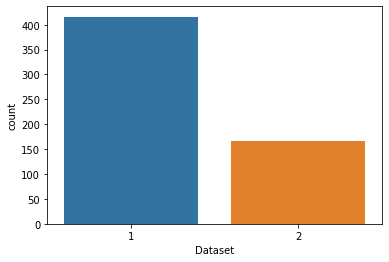

In [ ]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [ ]:
df_sex = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_sex], axis=1)
Droop_gender = df_new.drop(labels=['Gender' ],axis=1 )
Droop_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male','Fmale','Dataset']

X = Droop_gender.drop('Dataset',axis=1)
y = Droop_gender['Dataset']


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the data
history =classifier.fit(X_train, y_train, batch_size = 20, epochs = 50)

Epoch 1/50
24/24 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.6907
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.7436
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.7433
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7697
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7456
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7505
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7560
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.7389
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.7087
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9571
Epoch 11/50
24/24 [

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


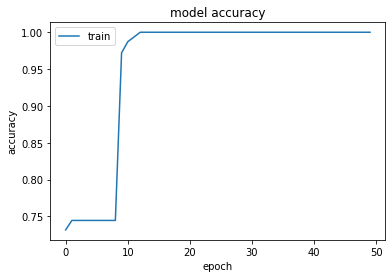

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

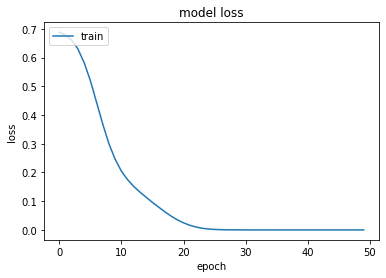

In [ ]:

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

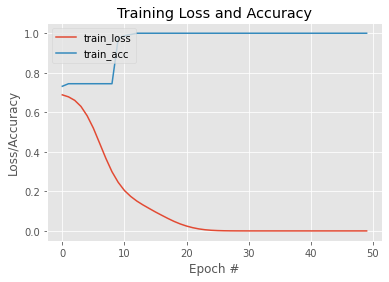

In [ ]:
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        94

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



In [ ]:
confusion_matrix(y_test, y_pred)

array([[23,  0],
       [ 0, 94]])